In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('train.csv')

features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = pd.get_dummies(df[features])
y = df.SalePrice


In [4]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state=1)

In [6]:
def get_mae(nodes, train_X, val_X, train_y, val_y):
   model = DecisionTreeRegressor(random_state=1,max_leaf_nodes=nodes)
   model.fit(train_X,train_y)
   mae = mean_absolute_error(model.predict(val_X),val_y)
   return mae

75 27672.124557104653


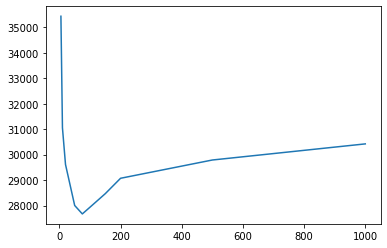

In [14]:
max_node_counts = [5,10,20,50,75,100,150,200,500,1000]
results = [get_mae(i,train_X, val_X, train_y, val_y) for i in max_node_counts]
print(max_node_counts[results.index(min(results))],min(results))
plt.plot(max_node_counts,results)
plt.show()

In [13]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X,train_y)
print(mean_absolute_error(rf_model.predict(val_X),val_y))

22255.863997064578


In [17]:
test = pd.read_csv('test.csv')
X_test = test[features]

In [18]:
final_model = RandomForestRegressor(random_state=1)
final_model.fit(X,y)
predictions = final_model.predict(X_test)

In [20]:
output = pd.DataFrame({'Id': test.Id, 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)